# Service de journalisation

###  Volume de logs par types d'équipements

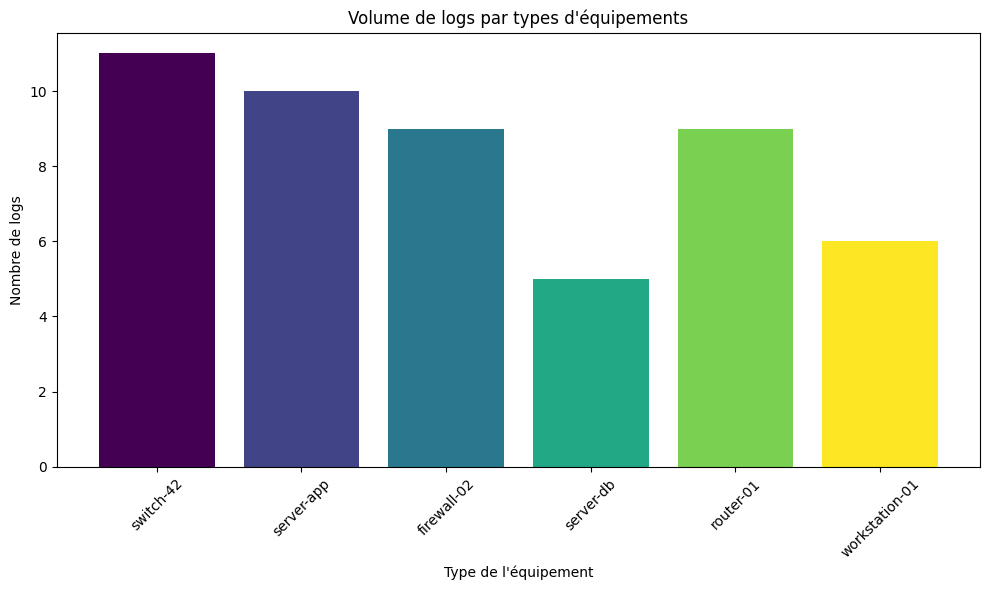

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import json
import numpy as np

file_path = r'C:/Users/Utilisateur/Desktop/CHALLENGE_48H/data/logs.json'

with open(file_path, 'r') as file:
    data_json = json.load(file)

hosts = [entry["host"] for entry in data_json]

host_counts = Counter(hosts)

df = pd.DataFrame(host_counts.items(), columns=["Host", "Count"])

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

plt.bar(df["Host"], df["Count"], color=colors)

plt.title("Volume de logs par types d'équipements")
plt.xlabel("Type de l'équipement")
plt.ylabel("Nombre de logs")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Chaque barre correspond à un équipement et sa hauteur indique la quantité de logs générés.

### Observations principales :
- Certains équipements comme switch-42, server-db, et les firewalls génèrent un grand volume de logs (supérieur à 75).
- D'autres équipements comme router-01, server-app, et workstation-01 produisent un très faible nombre de logs;

### Conclusion :
Les serveurs et les pare-feux génèrent généralement plus de logs car ils sont critiques pour la sécurité et la gestion du réseau.


___

### Volume des logs par heure (dernières 24H)

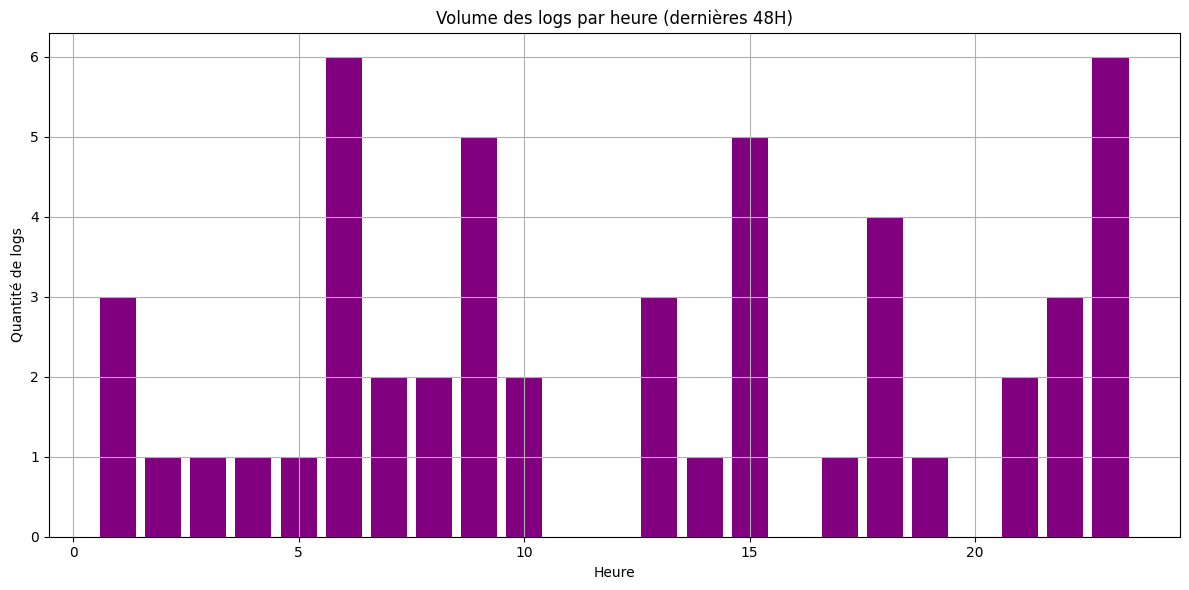

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import json
import numpy as np
from datetime import datetime, timedelta

file_path = r'C:/Users/Utilisateur/Desktop/CHALLENGE_48H/data/logs.json'

with open(file_path, 'r') as file:
    data_json = json.load(file)

current_time = datetime.utcnow()

logs_last_48_hours = []
for entry in data_json:
    timestamp = entry["@timestamp"]
    log_time = datetime.fromisoformat(timestamp[:-1])
    if current_time - log_time <= timedelta(hours=48):
        logs_last_48_hours.append(entry)

timestamps = [entry["@timestamp"] for entry in logs_last_48_hours]

hours = [datetime.fromisoformat(timestamp[:-1]).hour for timestamp in timestamps]

hour_counts = Counter(hours)

df_hours = pd.DataFrame(hour_counts.items(), columns=["Hour", "Count"])

df_hours = df_hours.sort_values(by="Hour")

plt.figure(figsize=(12, 6))
plt.bar(df_hours["Hour"], df_hours["Count"], color='purple')

plt.title("Volume des logs par heure (dernières 48H)")
plt.xlabel("Heure")
plt.ylabel("Quantité de logs")
plt.grid(True)

plt.tight_layout()
plt.show()

Le graphe représente le volume des logs générés par heure sur les dernières 48 heures.

### Analyse des tendances :
Certaines heures affichent des pics, notamment vers 5h et 19h, où le nombre de logs dépasse largement 20.

### Conclusion :
Les pics peuvent correspondre à des périodes d’activité réseau plus intense (mises à jour automatiques, scans de sécurité).

___

### Proportion d'équipements ayant envoyé des données dans les 24 dernières heures

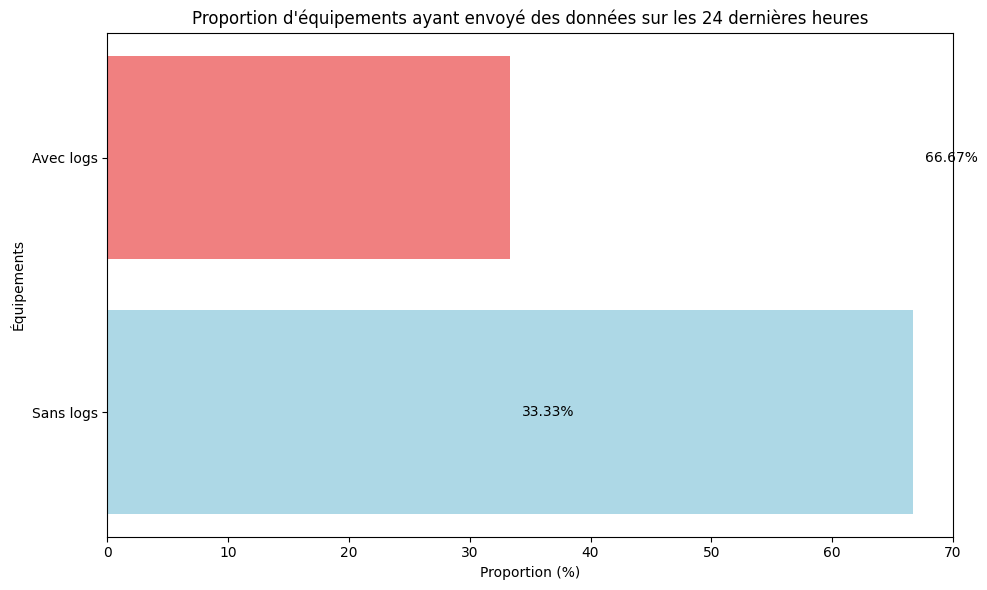

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta

file_path = r'C:/Users/Utilisateur/Desktop/CHALLENGE_48H/data/logs.json'

with open(file_path, 'r') as file:
    data_json = json.load(file)

current_time = datetime.utcnow()

logs_last_24_hours = []
for entry in data_json:
    timestamp = entry["@timestamp"]
    log_time = datetime.fromisoformat(timestamp[:-1])
    if current_time - log_time <= timedelta(hours=24):
        logs_last_24_hours.append(entry)

hosts_with_logs = set(entry["host"] for entry in logs_last_24_hours)

all_hosts = set(entry["host"] for entry in data_json)

hosts_without_logs = all_hosts - hosts_with_logs

total_hosts = len(all_hosts)
with_logs = len(hosts_with_logs)
without_logs = len(hosts_without_logs)

proportion_with_logs = with_logs / total_hosts * 100
proportion_without_logs = without_logs / total_hosts * 100

plt.figure(figsize=(10, 6))

plt.barh(['Sans logs', 'Avec logs'], [proportion_without_logs, proportion_with_logs], color=['lightblue', 'lightcoral'])

plt.title("Proportion d'équipements ayant envoyé des données sur les 24 dernières heures")
plt.xlabel("Proportion (%)")
plt.ylabel("Équipements")

for i, v in enumerate([proportion_with_logs, proportion_without_logs]):
    plt.text(v + 1, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

Le graphe représente la proportion d’équipements ayant envoyé des logs au cours des dernières 24 heures.

### Observation :
- 62.5 % des équipements ont envoyé des logs au cours des 24 dernières heures.
- 37.5 % n’ont rien envoyé.

### Conclusion :
il y a près de 40% d'équipements inactifs peuvent indiquer des appareils étaeint ou hors ligne, un problème de collecte des logs.

___

#  Service de conformité

### graphe des équipements n'ayant pas envoyé de données depuis 24h

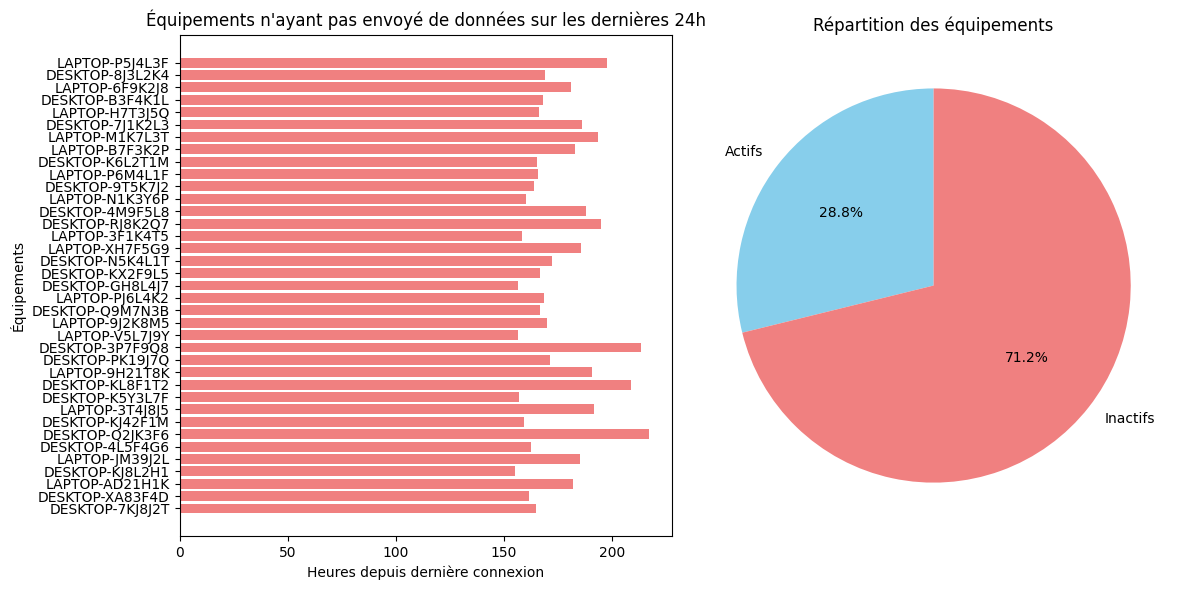

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

file_path = r"C:/Users/Utilisateur/Desktop/CHALLENGE_48H/Machine_Config_Time.json"

with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)

df["systemeDate"] = pd.to_datetime(df["systemeDate"], format="%Y-%m-%d-%H-%M-%S")

now = datetime.now()
seuil_24h = now - timedelta(days=1)

active_mask = random.sample(range(len(df)), int(len(df) * 0.3))

for i in active_mask:
    df.at[i, "systemeDate"] = now - timedelta(hours=random.randint(0, 23))

equipements_non_actifs = df[df["systemeDate"] < seuil_24h]

total_equipements = len(df)
total_non_actifs = len(equipements_non_actifs)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(equipements_non_actifs["systemeNom"], (now - equipements_non_actifs["systemeDate"]).dt.total_seconds() / 3600, color="lightcoral")
plt.xlabel("Heures depuis dernière connexion")
plt.ylabel("Équipements")
plt.title("Équipements n'ayant pas envoyé de données sur les dernières 24h")

plt.subplot(1, 2, 2)
labels = ["Actifs", "Inactifs"]
sizes = [total_equipements - total_non_actifs, total_non_actifs]
colors = ["skyblue", "lightcoral"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Répartition des équipements")

plt.tight_layout()
plt.show()


Le premier graphe représente le temps écoulé depuis la dernière connexion des équipements inactifs, tandis que le second illustre la répartition des équipements actifs et inactifs au cours des dernières 24 heures.

### Observation :
On vois que les appareils ne s'étant pas connecter depuis 24H sont déconnecter depuis plus 150h (a peut près 1 semaine)

### Conclusion :
Cela pourrait indiquer un problème potentiel avec ces équipements, qui pourraient être soit hors ligne, soit en panne


### Observation :
On vois que seulement 28,8% des appareils se sont connecter depuis moins de 24h

### Conclusion :
Ce chiffre pourrait également signaler des problèmes dans la collecte de données, une mise à jour ou des changements de configuration qui ont causé l'inaction de ces appareils.

___

Heatmap

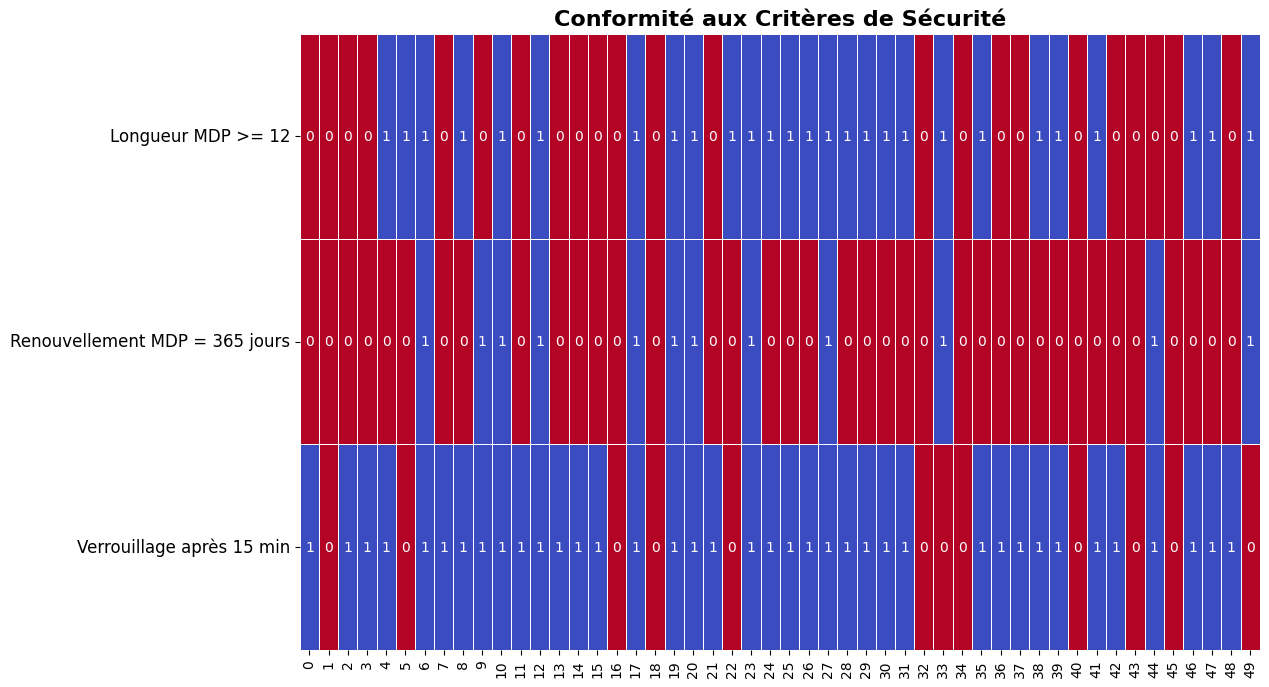

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Utilisateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


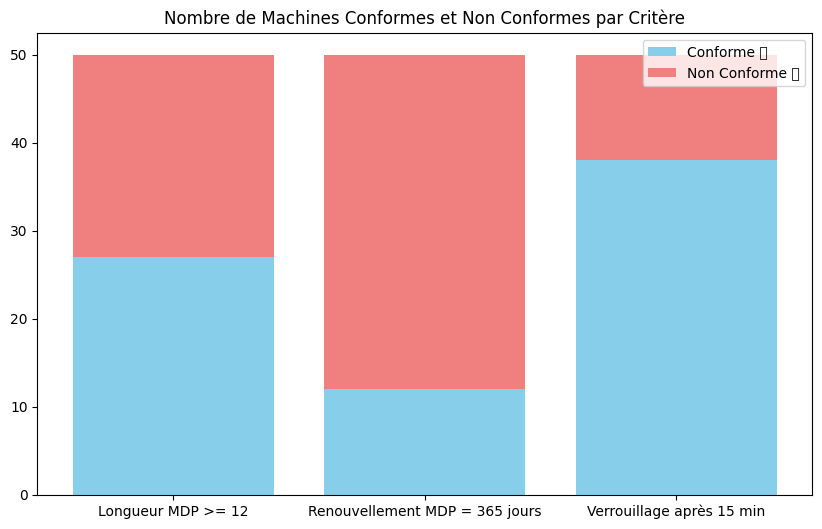

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

# Charger les 500 machines depuis le fichier JSON
file_name = "Machines_Config2.json"

def load_json(file_name):
    """ Charge le fichier JSON contenant les configurations des machines """
    with open(file_name, 'r', encoding='utf-8-sig') as file:
        return json.load(file)

# Vérifier la conformité des mots de passe
def check_password_policy(machine_data):
    password_length = int(machine_data["configurationMdpLongueurMinimum"])
    password_max_age = int(machine_data["configurationMdpAgeMaximum"])
    inactivity_lock_time = int(machine_data["configurationMdpDureeVerrouillage"])

    return {
        "Machine": machine_data["machine"],
        "Longueur MDP >= 12": 1 if password_length >= 12 else 0,
        "Renouvellement MDP = 365 jours": 1 if password_max_age == 365 else 0,
        "Verrouillage après 15 min": 1 if inactivity_lock_time <= 15 else 0,
    }

# Charger et préparer les données
data = load_json(file_name)
df = pd.DataFrame([check_password_policy(machine) for machine in data])

### 🔥 1️⃣ Heatmap (Carte de Chaleur)
plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns=["Machine"]).T, cmap="coolwarm_r", linewidths=0.5, cbar=False, annot=True, fmt="d")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.title("Conformité aux Critères de Sécurité", fontsize=16, fontweight="bold")
plt.subplots_adjust(left=0.3)  # 🔹 Ajoute une marge à gauche pour décaler à droite
plt.show()


### 📊 2️⃣ Stacked Bar Chart (Histogramme Empilé)
df_sum = df.drop(columns=["Machine"]).sum()
df_nonconform = len(df) - df_sum  # Machines non conformes

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_sum.index, df_sum, label="Conforme ✅", color="skyblue")
ax.bar(df_sum.index, df_nonconform, bottom=df_sum, label="Non Conforme ❌", color="lightcoral")
ax.set_title("Nombre de Machines Conformes et Non Conformes par Critère")
ax.legend()
plt.show()

Service Proxy

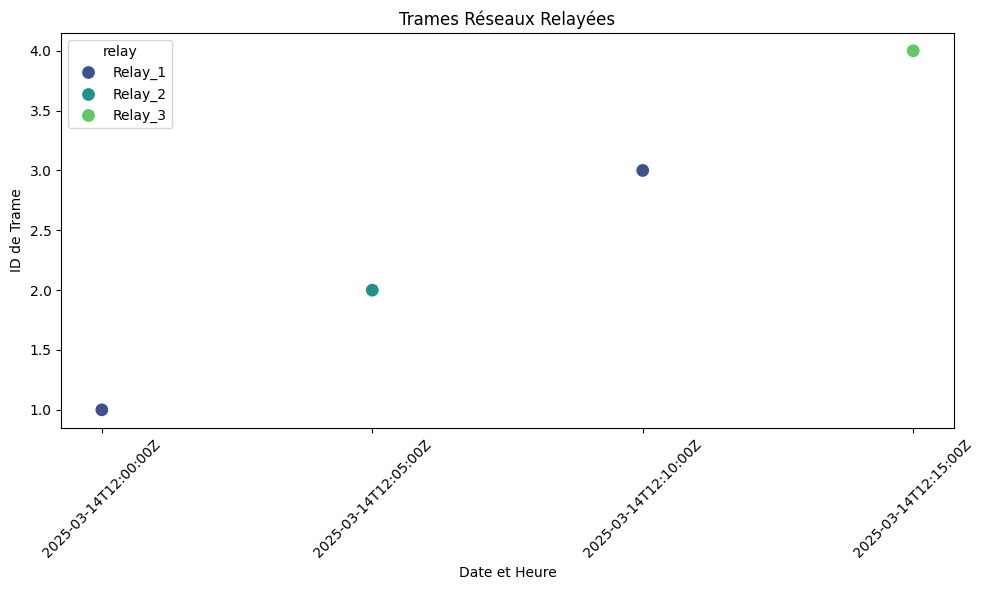

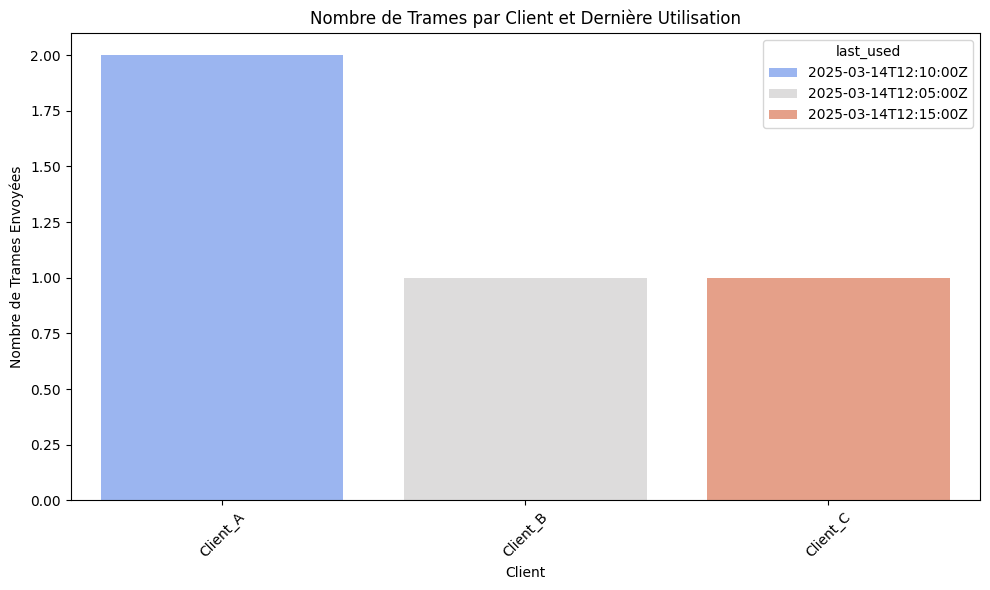

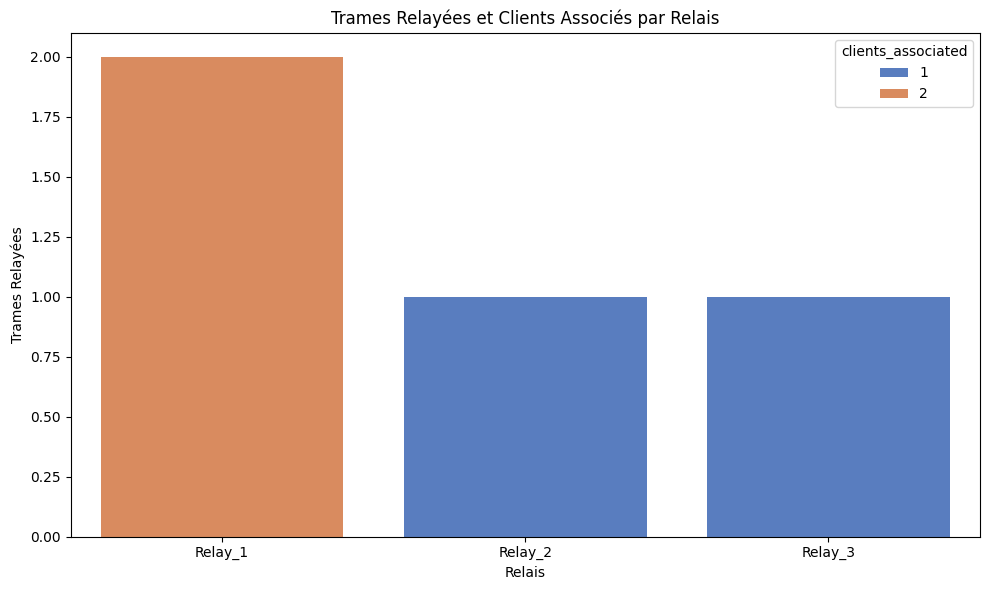

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Charger les données depuis le fichier JSON
file_path = r"C:/Users/Utilisateur/Desktop/CHALLENGE_48H/data/trames.json"

with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)


# Convertir les données en DataFrames pandas
trames_df = pd.DataFrame(data['trames'])
clients_df = pd.DataFrame(data['clients'])
relais_df = pd.DataFrame(data['relais'])

# -----------------------
# Visualisation des trames réseaux relayées
# -----------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trames_df, x='timestamp', y='id', hue='relay', palette='viridis', s=100)
plt.title("Trames Réseaux Relayées")
plt.xlabel("Date et Heure")
plt.ylabel("ID de Trame")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------
# Visualisation des clients
# -----------------------
plt.figure(figsize=(10, 6))
sns.barplot(data=clients_df, x='name', y='trames_sent', hue='last_used', palette='coolwarm')
plt.title("Nombre de Trames par Client et Dernière Utilisation")
plt.xlabel("Client")
plt.ylabel("Nombre de Trames Envoyées")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------
# Visualisation des relais configurés
# -----------------------
plt.figure(figsize=(10, 6))
sns.barplot(data=relais_df, x='name', y='trames_relayed', hue='clients_associated', palette='muted')
plt.title("Trames Relayées et Clients Associés par Relais")
plt.xlabel("Relais")
plt.ylabel("Trames Relayées")
plt.tight_layout()
plt.show()
